# AI for Injection Moulding

## Importing Modules

In [1]:
import Helper as hp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## Reading Data

### Input Data

In [2]:
input_data = hp.read_input_data()
test_data = hp.read_test_data()
Y2 = hp.read_Y(os.getcwd()+"/Data/Y2.csv")
Y2 = [int(y2) for y2 in Y2]
input_data_df = pd.DataFrame.from_dict(input_data)
input_data_df["valid_or_not"] = Y2
features1 = hp.time_series2features(input_data["ramposition"],
                                    input_data["ramposition_time"])

In [3]:
input_data_df.head()

,ramposition,ramposition_time,injection_pressure,injection_pressure_time,sensor_pressure,sensor_pressure_time,valid_or_not
0,"[0.071227, 0.070499, 0.06996, 0.06934, 0.06879...","[0.00669, 0.015201, 0.021505, 0.028743, 0.0350...","[0.0, 2836400.0, 5461800.0, 7290900.0, 9201700...","[0.0, 0.00669, 0.015201, 0.021505, 0.028743, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00669, 0.015201, 0.021505, 0.028743, 0.0350...",1
1,"[0.071227, 0.070506, 0.069968, 0.069349, 0.068...","[0.007142, 0.016141, 0.022851, 0.03058, 0.0373...","[0.0, 2719500.0, 5223100.0, 6981400.0, 8817000...","[0.0, 0.007142, 0.016141, 0.022851, 0.03058, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.007142, 0.016141, 0.022851, 0.03058, 0.0373...",1
2,"[0.071227, 0.07048, 0.069943, 0.06933, 0.06878...","[0.0074, 0.017065, 0.023998, 0.03193, 0.038993...","[0.0, 2985100.0, 5853000.0, 7770100.0, 9795700...","[0.0, 0.0074, 0.017065, 0.023998, 0.03193, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0074, 0.017065, 0.023998, 0.03193, 0.038993...",1
3,"[0.071227, 0.070522, 0.069982, 0.069359, 0.068...","[0.007268, 0.016227, 0.023072, 0.030986, 0.037...","[0.0, 2510300.0, 4774100.0, 6414900.0, 8109300...","[0.0, 0.007268, 0.016227, 0.023072, 0.030986, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.007268, 0.016227, 0.023072, 0.030986, 0.037...",1
4,"[0.071227, 0.070501, 0.069961, 0.069342, 0.068...","[0.006897, 0.015651, 0.022148, 0.029611, 0.036...","[0.0, 2795600.0, 5384200.0, 7191900.0, 9078600...","[0.0, 0.006897, 0.015651, 0.022148, 0.029611, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.006897, 0.015651, 0.022148, 0.029611, 0.036...",1


In [4]:
header1 = "Feature"
header2 = "Dimension"
header3 = "Element Data Type"
print(f"{header1:<30}{header2:<20}{header3:<20}")
print("---------------------------------------------------------------------")
for key in input_data.keys():
    print(f"{key:<30}{len(input_data[key]):<20}{str(type(input_data[key][0][0])):<20}")

Feature                       Dimension           Element Data Type   
---------------------------------------------------------------------
ramposition                   1542                <class 'float'>     
ramposition_time              1542                <class 'float'>     
injection_pressure            1542                <class 'float'>     
injection_pressure_time       1542                <class 'float'>     
sensor_pressure               1542                <class 'float'>     
sensor_pressure_time          1542                <class 'float'>     


#### Analysis of Input Data

In [5]:
len(input_data["ramposition_time"])

1542

#### Distinction between Valid Bins and Non-Valid Bins

In [6]:
# Selection of non-defectous bins (here called valid_bins)
valid_bins = input_data_df[input_data_df["valid_or_not"] == 1]
not_valid_bins = input_data_df[input_data_df["valid_or_not"] == 0]
n_valid_bins = len(valid_bins)
n_not_valid_bins = len(not_valid_bins)
print(f"The number of valid bins is {n_valid_bins} which correspond to the \
      {n_valid_bins/len(input_data_df)*100:.2f} %")
print(f"The number of not valid bins is {n_not_valid_bins} which correspond \
      to the {n_not_valid_bins/len(input_data_df)*100:.2f} %")

The number of valid bins is 1080 which correspond to the       70.04 %
The number of not valid bins is 462 which correspond       to the 29.96 %


In [7]:
# function to plot the three time series consecutively
def show3_time_series(rpt, rp, ipt, ip, pt, p, v) -> None:
    """
    rpt, rp: ramposition time, ramposition
    ipt, ip: injection pressure time, injection pressure
    pt, p:   pressure time, pressure
    v: valid or not valid
    """
    # defaults are: figsize=(6.4, 4.8) width and height in inches, dpi=100 default
    fs = 20  # fontsize
    lw = 5  # linewidth
    fig = plt.figure(figsize=[30, 10], dpi=100)
    if v:
        fig.suptitle('Consecutive Time Series Whole Process (Valid Bin)', fontsize=fs*1.5)
    else:
        fig.suptitle('Consecutive Time Series Whole Process (Not Valid Bin)', fontsize=fs*1.5)
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    axs = [ax1, ax2, ax3]
    for ax in axs:
        ax.minorticks_on()
        ax.tick_params('both', length=20, width=2, which='major', labelsize=fs)
        ax.tick_params('both', length=10, width=1, which='minor', labelsize=fs)
        ax.set_xlabel('Time (ms)', fontsize=fs)
    ax1.plot(rpt, rp, color='c', linewidth=lw)
    ax1.set_title('Ram Position', fontsize=fs)
    ax1.set_ylabel('Ram Position', fontsize=fs)
    ax2.plot(ipt, ip, color='y', linewidth=lw)
    ax2.set_title('Injection Pressure', fontsize=fs)
    ax2.set_ylabel('Injection Pressure', fontsize=fs)
    ax2.set(xlabel='Time (ms)', ylabel='Injection Pressure')
    ax3.plot(pt, p, color='purple', linewidth=lw)
    ax3.set_title('Sensor Pressure', fontsize=fs)
    ax3.set_ylabel('Sensor Pressure', fontsize=fs)
    plt.show()

- We select a random population of equal size for valid and not valid bins

In [8]:
# to be able to plot the entries by index
not_valid_bins = not_valid_bins.reset_index()
valid_bins = valid_bins.reset_index()

[454 704 999]
[321 145 227]
454


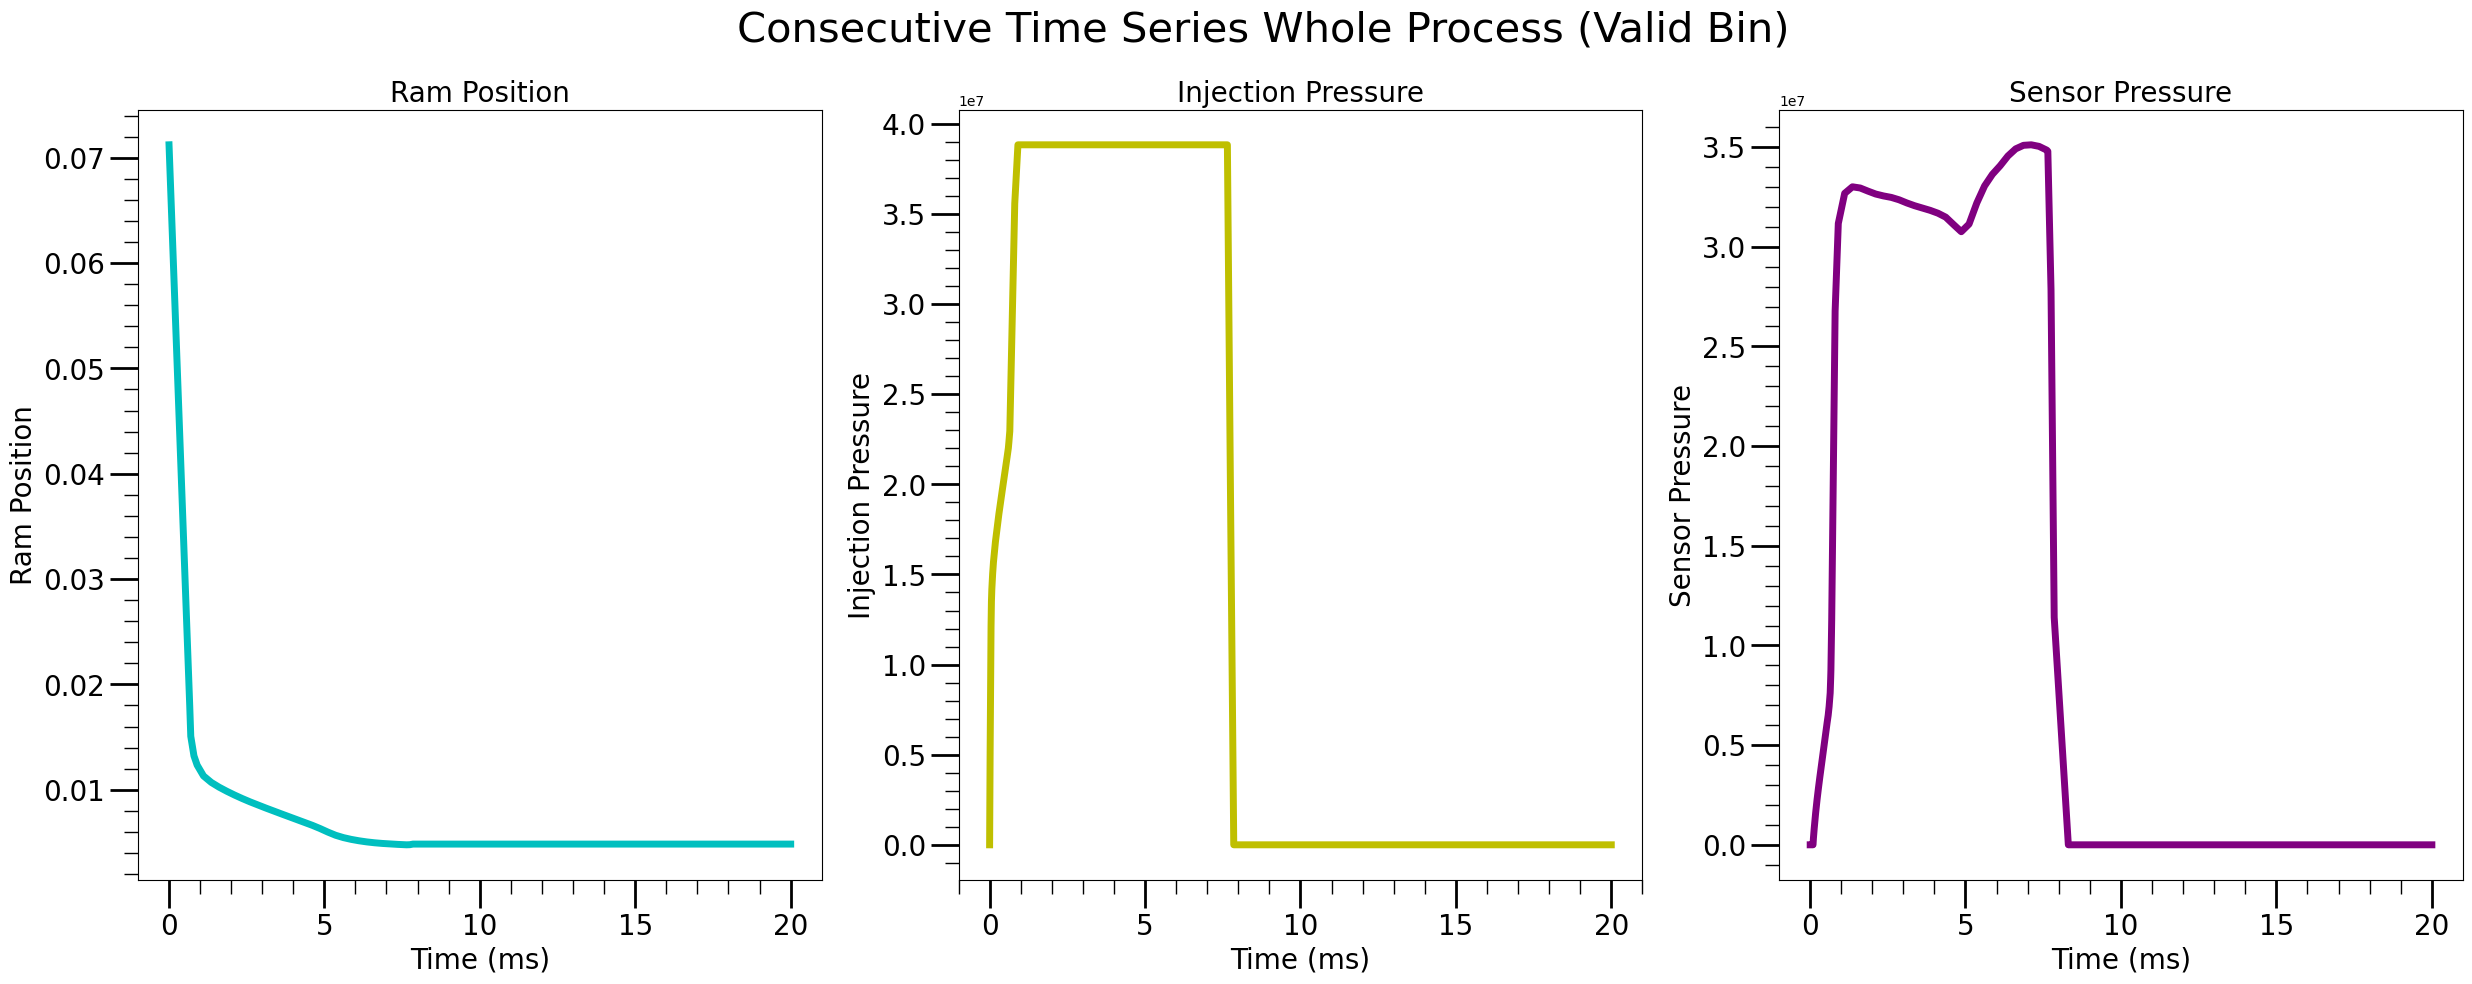

321


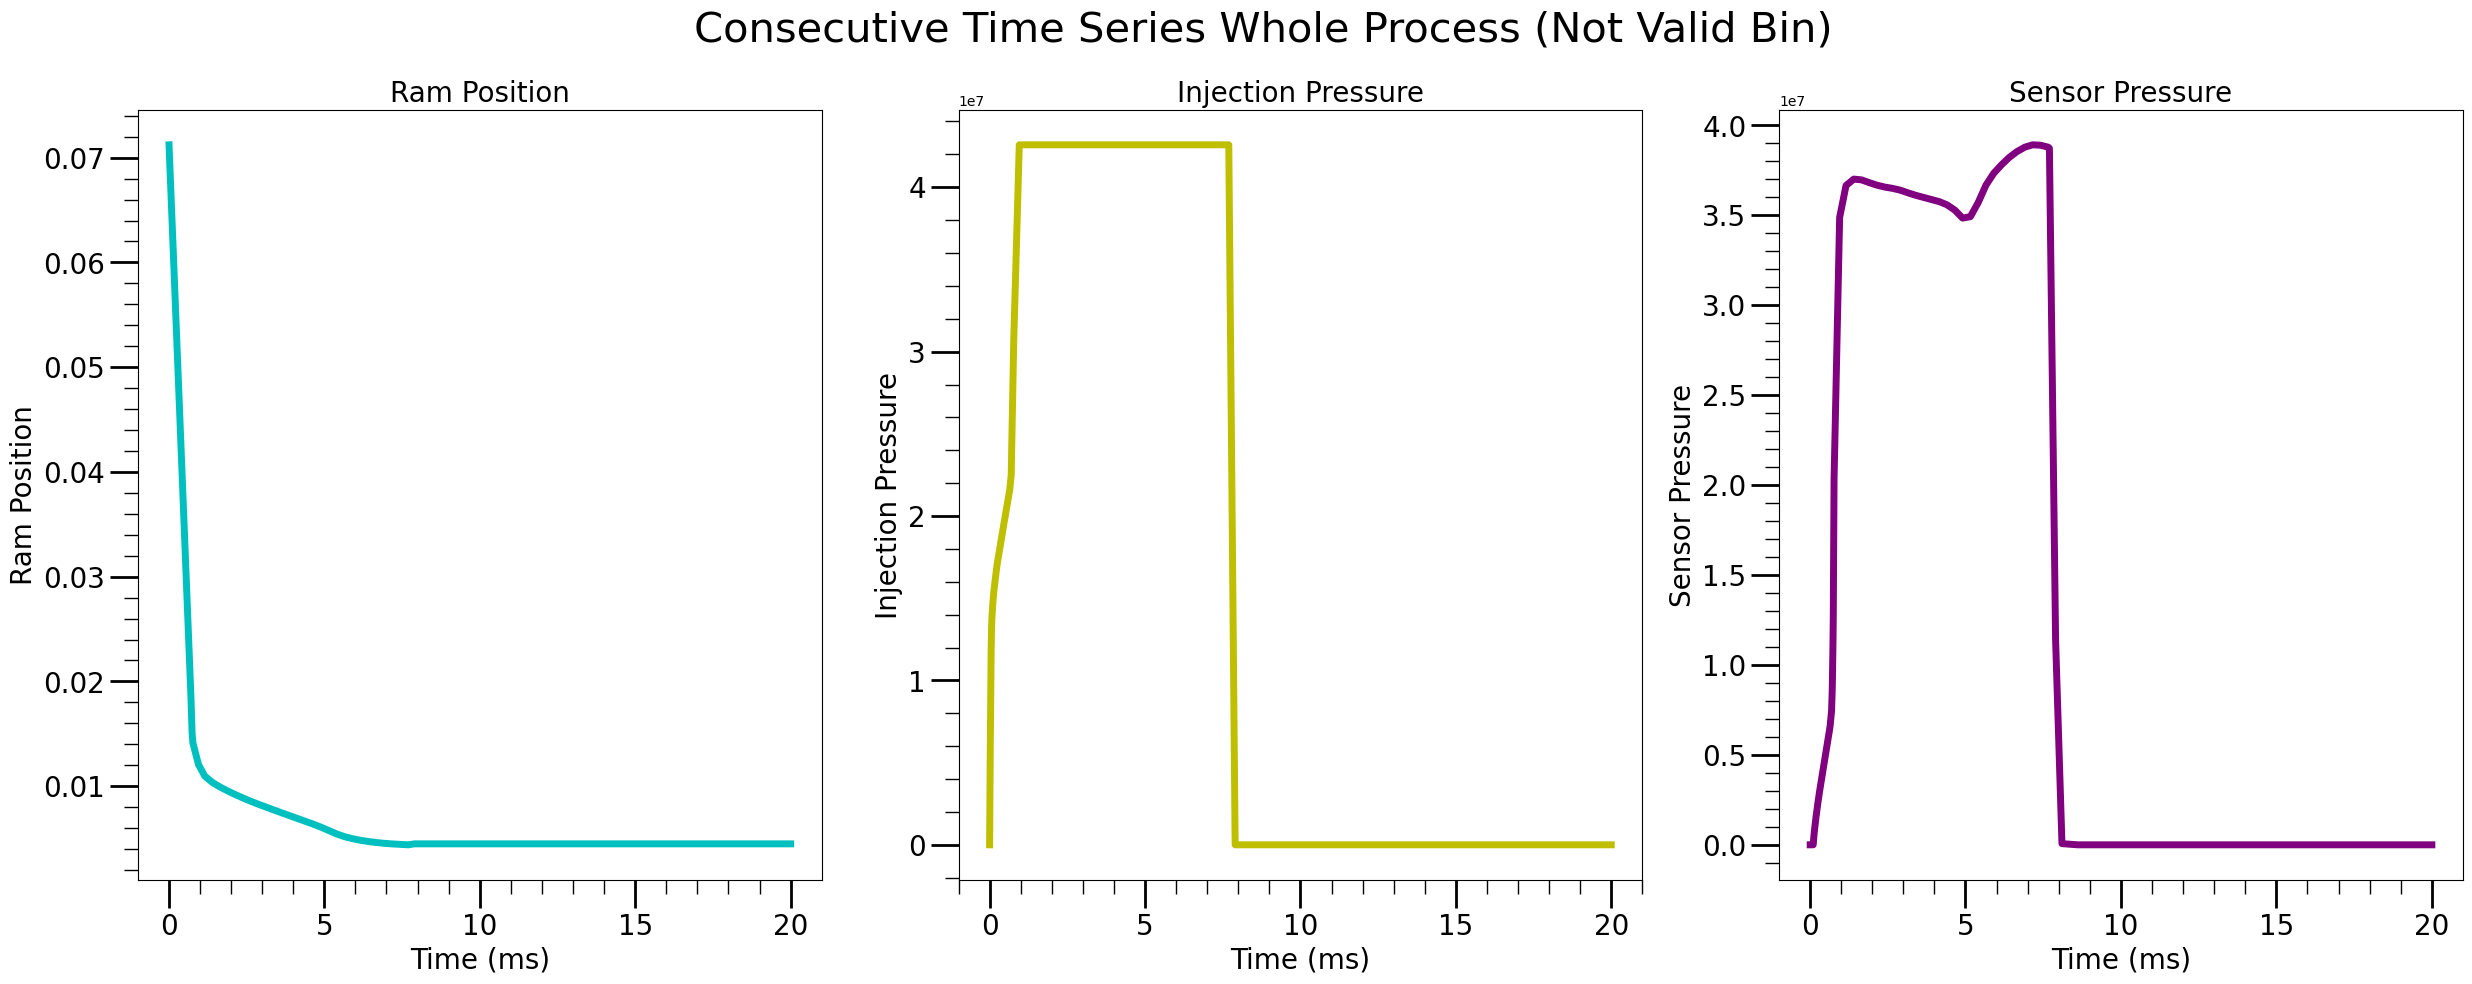

704


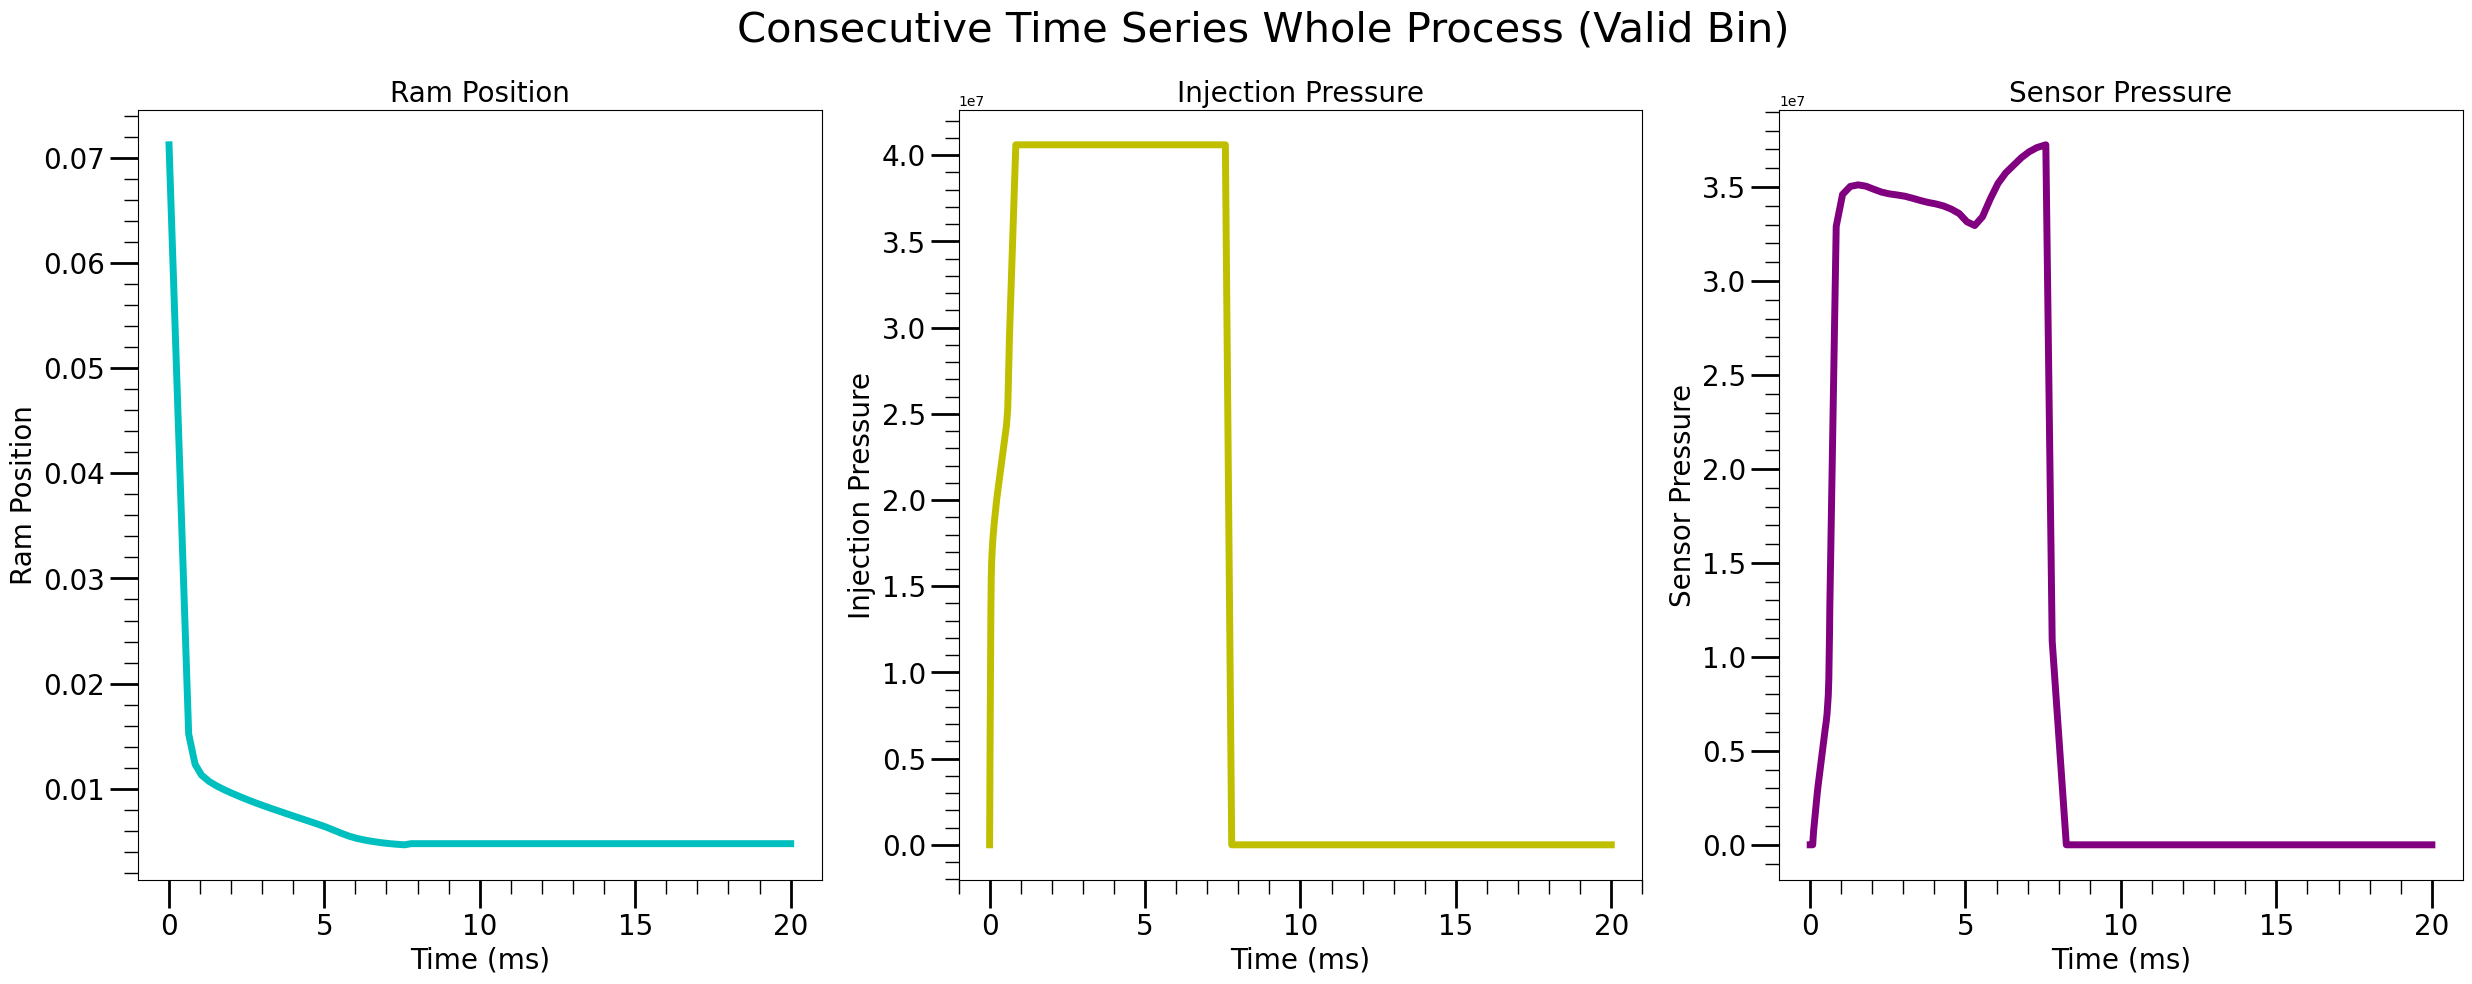

145


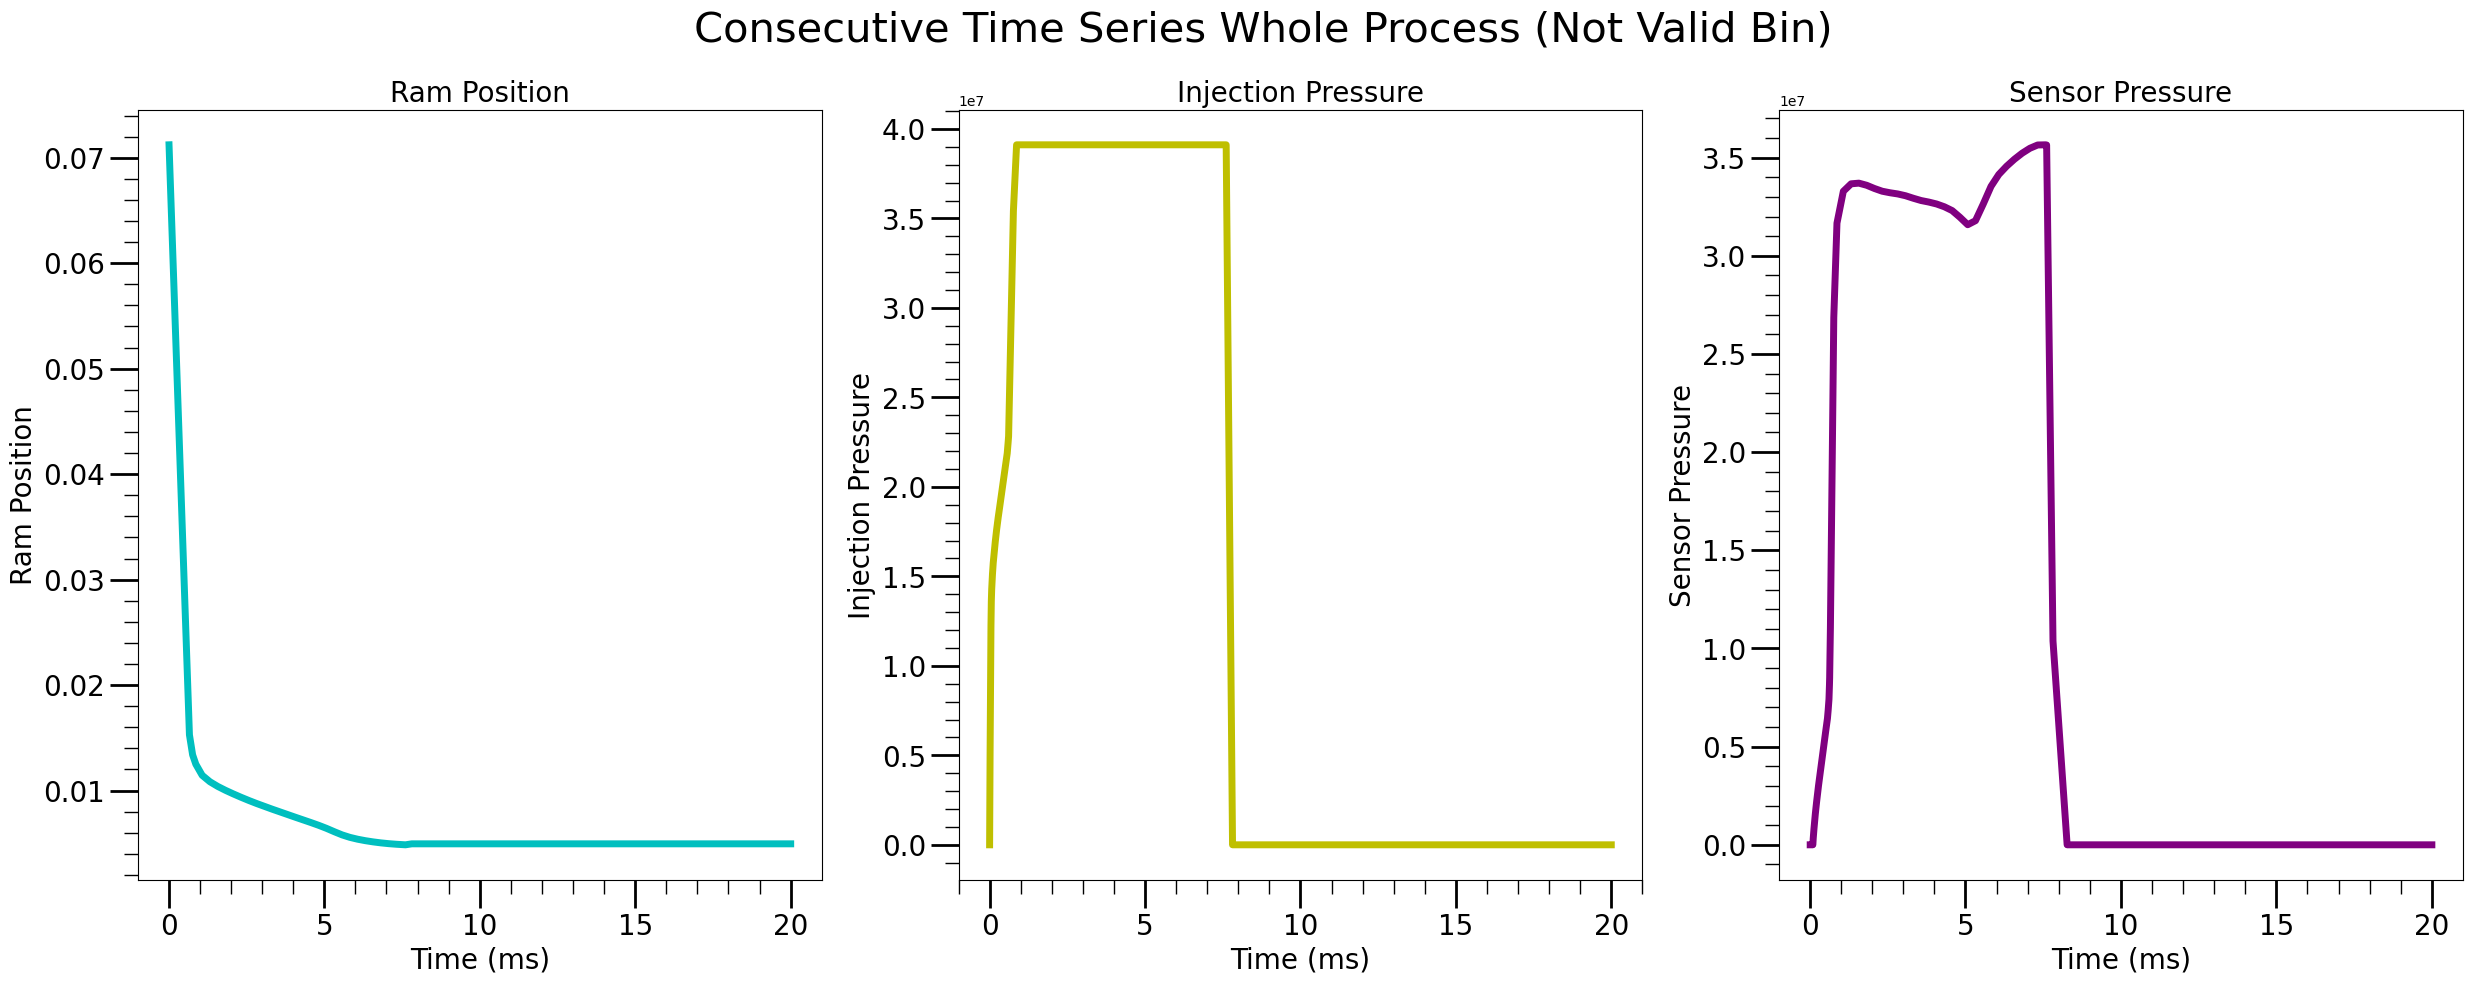

999


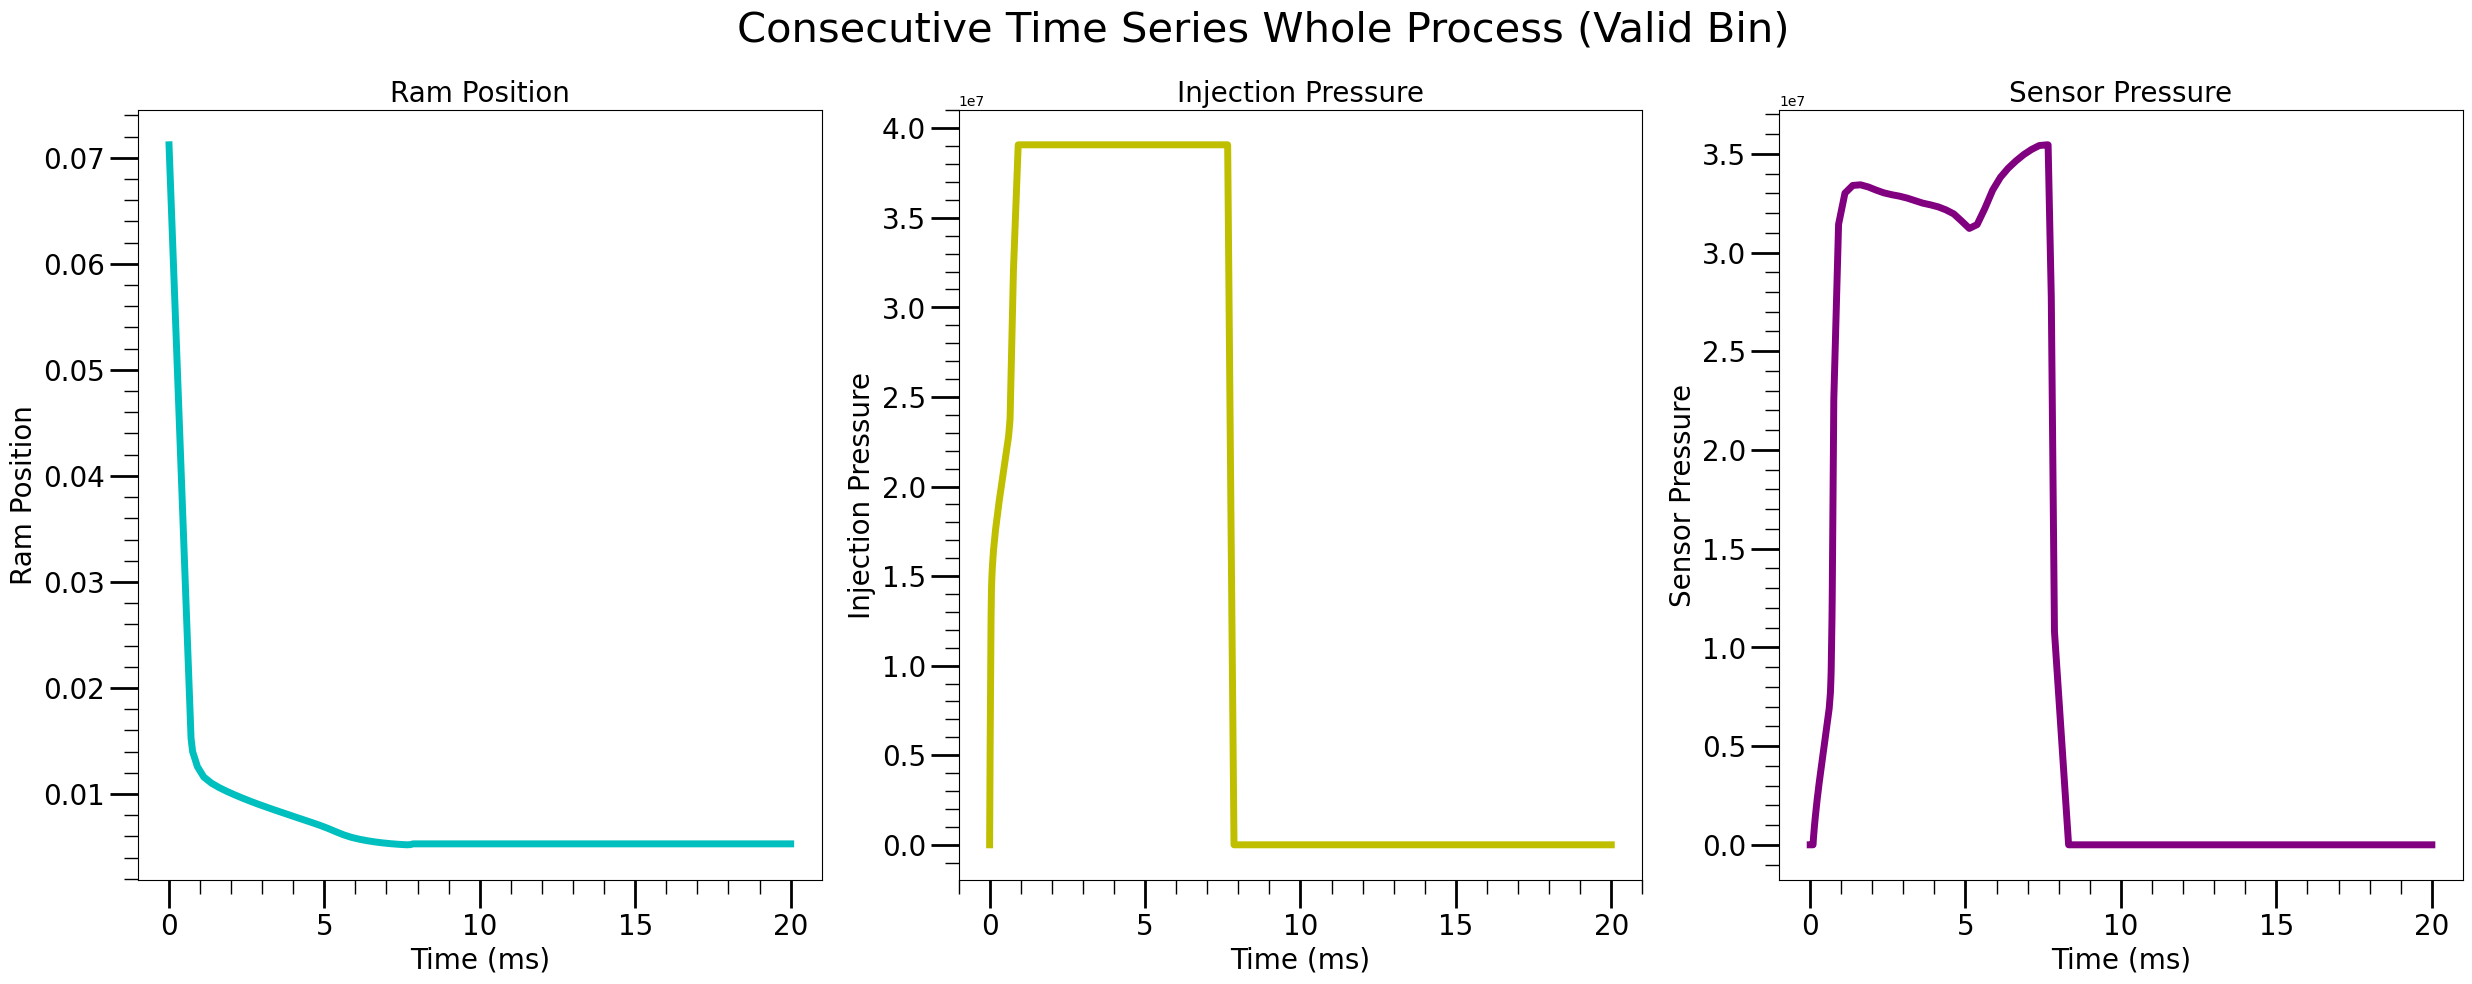

227


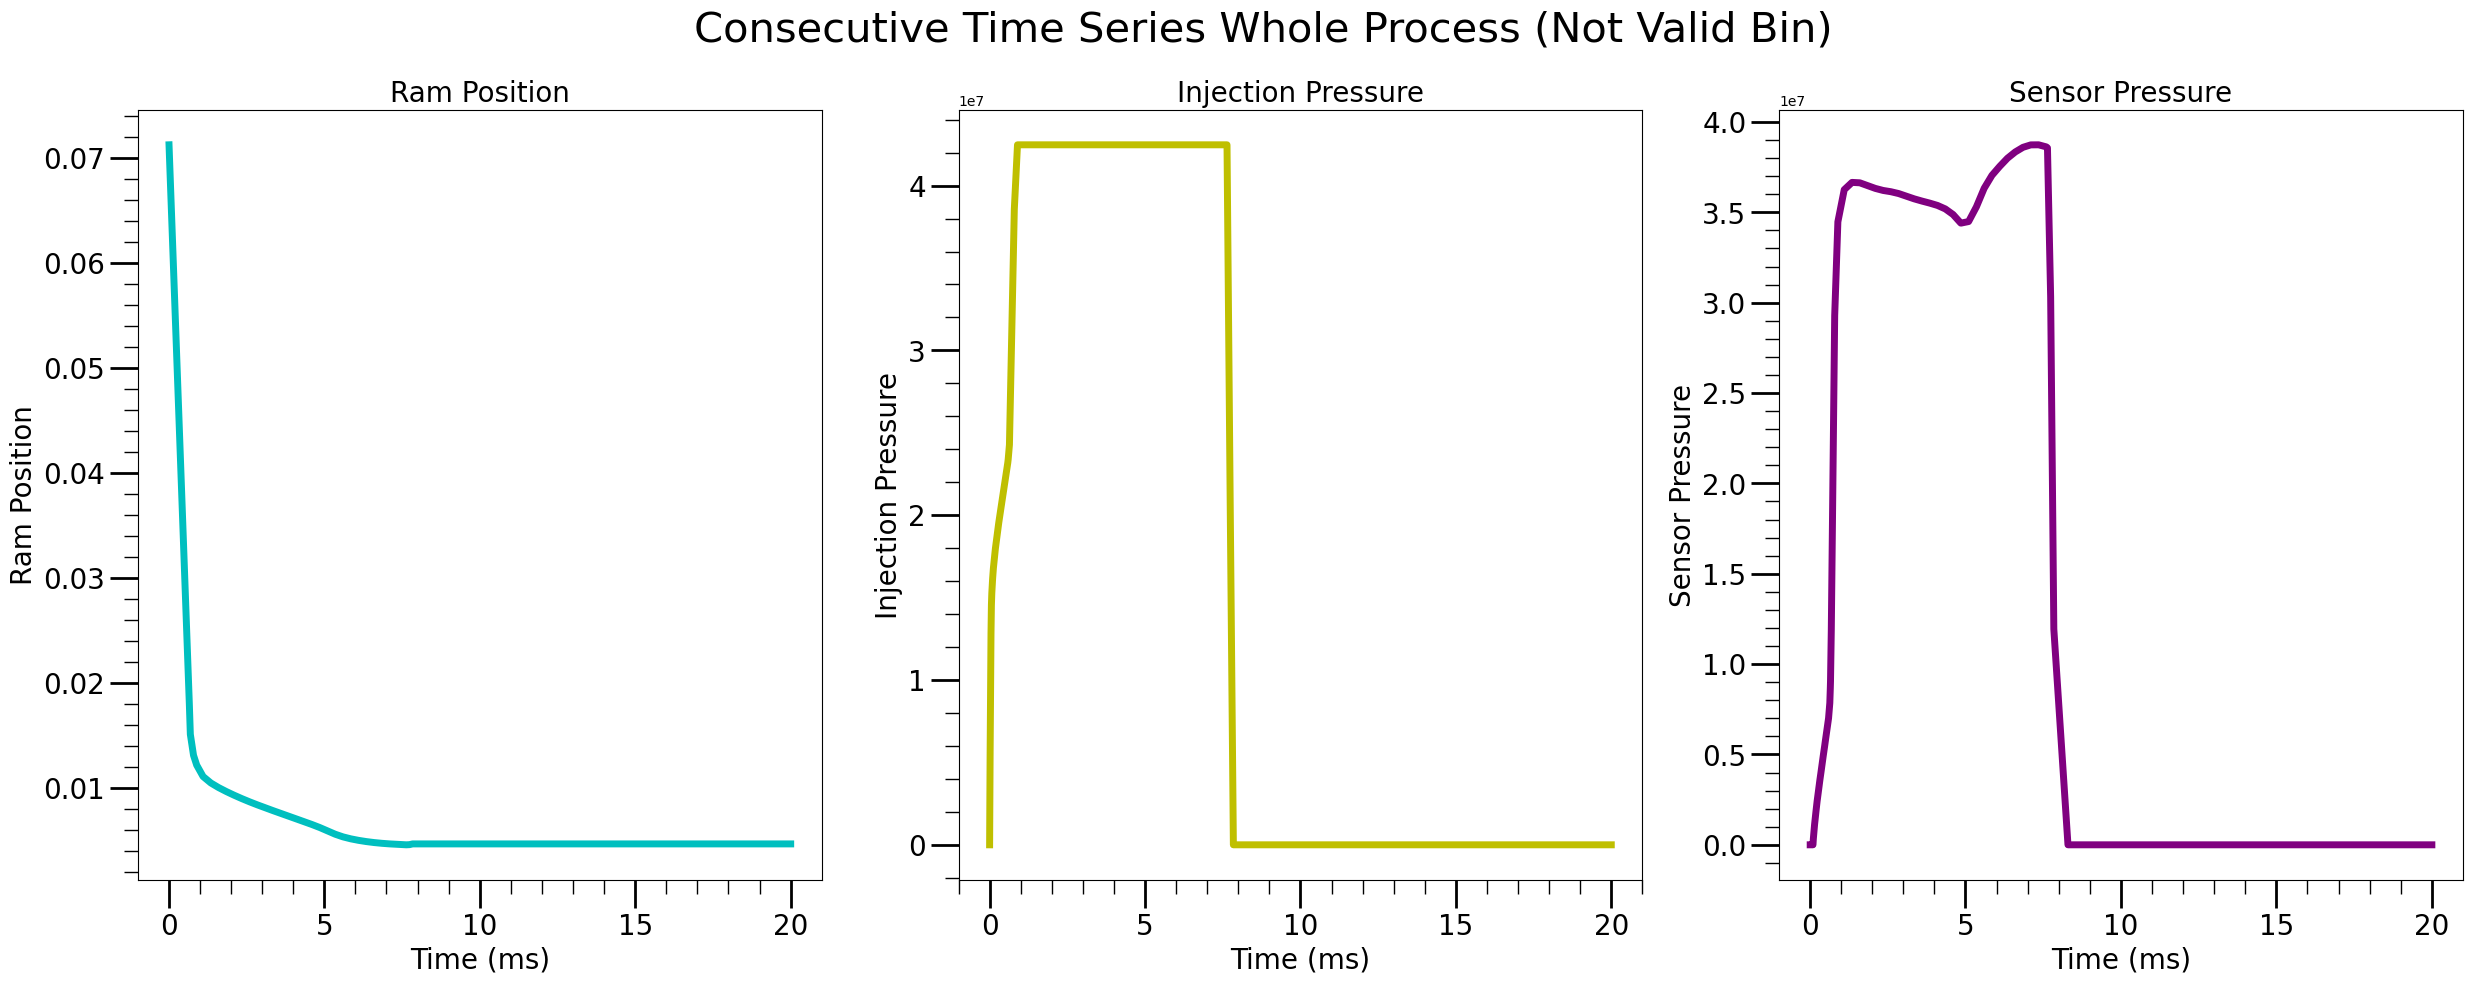

In [9]:
n = 3  # number of random population (max is len(not_valid_bins))
if n <= len(not_valid_bins):
    random_indices_v = np.random.randint(0, len(valid_bins), n)
    random_indices_nv = np.random.randint(0, len(not_valid_bins), n)
    print(random_indices_v)
    print(random_indices_nv)
for i in range(n):
    valid_index = random_indices_v[i]
    print(valid_index)
    rptv = valid_bins.ramposition_time[valid_index]
    rpv = valid_bins.ramposition[valid_index]
    iptv = valid_bins.injection_pressure_time[valid_index]
    ipv = valid_bins.injection_pressure[valid_index]
    ptv = valid_bins.sensor_pressure_time[valid_index]
    pv = valid_bins.sensor_pressure[valid_index]
    show3_time_series(rptv, rpv, iptv, ipv, ptv, pv, True)
    n_valid_index = random_indices_nv[i]
    print(n_valid_index)
    rptnv = not_valid_bins.ramposition_time[n_valid_index]
    rpnv = not_valid_bins.ramposition[n_valid_index]
    iptnv = not_valid_bins.injection_pressure_time[n_valid_index]
    ipnv = not_valid_bins.injection_pressure[n_valid_index]
    ptnv = not_valid_bins.sensor_pressure_time[n_valid_index]
    pnv = not_valid_bins.sensor_pressure[n_valid_index]
    show3_time_series(rptnv, rpnv, iptnv, ipnv, ptnv, pnv, False)

#### Visual Analysis
- To the naked eye is hard to determine the qualitatively difference between the valid bins and not valid bins.
- Some values such the the Injection Pressure Maximum, the value of the local minimum of the Sensor Pressure seems to have a correlation that could distinguish between the a valid and a not valid bin.

## Reading Label Data

In [10]:
# There are only 5 labels
# Y1: box opening (in mm), Y2: valid/non-valid, Y3: box weight (in grams)
# Y4: valid/non-valid, Y5: time it took to fill the mould (in seconds)
Y = [[] for _ in range(6)]
base_name = "./Data/Y"
for i in range(5):
    Y[i] = hp.read_Y(base_name + str(i + 1) + ".csv")

## Feature Engineering Extraction

In [11]:
ram_features = hp.time_series2features(input_data["ramposition"], input_data["ramposition_time"])
injection_pressure_features = hp.time_series2features(input_data["injection_pressure"], input_data["injection_pressure_time"])
sensor_pressure_features = hp.time_series2features(input_data["sensor_pressure"], input_data["sensor_pressure_time"])

#### Writing to disk the extracted features

In [12]:
np.savetxt("./Data/ram_features.csv", ram_features, delimiter=",")
np.savetxt("./Data/injection_pressure_features.csv", injection_pressure_features, delimiter=",")
np.savetxt("./Data/sensor_pressure_features.csv", sensor_pressure_features, delimiter=",")

In [13]:
print(type(ram_features))
print(ram_features.shape)
print(type(injection_pressure_features))
print(injection_pressure_features.shape)
print(type(sensor_pressure_features))
print(sensor_pressure_features.shape)

<class 'numpy.ndarray'>
(1542, 22)
<class 'numpy.ndarray'>
(1542, 22)
<class 'numpy.ndarray'>
(1542, 22)
